<a href="https://colab.research.google.com/github/vfabianfarias/Telecom-X-Alura-2/blob/main/Telecom_X_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación de los Datos

## Extracción del Archivo Tratado

In [2]:
import pandas as pd

# URL con los datos en formato JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Cargar el dataset desde JSON
df = pd.read_json(url)

# Mostrar información básica del dataset
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Normalizar / expandir las columnas anidadas
df_expanded = pd.json_normalize(df.to_dict(orient='records'))
df_expanded.head()


# Mostrar dimensiones y columnas iniciales
print("Dimensiones del df_expanded:", df_expanded.shape)
print("Columnas:", df_expanded.columns.tolist()[:20])  # primeras 20 columnas
df_expanded.head()

Dimensiones del df_expanded: (7267, 21)
Columnas: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly']


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# Diccionario de traducción actualizado
columnas_traducidas = {
    'customerID': 'cliente.id',
    'Churn': 'cancelacion',
    'customer.gender': 'cliente.genero',
    'customer.SeniorCitizen': 'cliente.adulto_mayor',
    'customer.Partner': 'cliente.pareja',
    'customer.Dependents': 'cliente.dependientes',
    'customer.tenure': 'cliente.antiguedad',
    'phone.PhoneService': 'telefono.servicio_telefonico',
    'phone.MultipleLines': 'telefono.multiples_lineas',
    'internet.InternetService': 'internet.servicio_internet',
    'internet.OnlineSecurity': 'internet.seguridad_online',
    'internet.OnlineBackup': 'internet.respaldo_online',
    'internet.DeviceProtection': 'internet.proteccion_dispositivo',
    'internet.TechSupport': 'internet.soporte_tecnico',
    'internet.StreamingTV': 'internet.streaming_tv',
    'internet.StreamingMovies': 'internet.streaming_peliculas',
    'account.Contract': 'cuenta.contrato',
    'account.PaperlessBilling': 'cuenta.facturacion_sin_papel',
    'account.PaymentMethod': 'cuenta.metodo_pago',
    'account.Charges.Monthly': 'cuenta.cargos_mensuales',
    'account.Charges.Total': 'cuenta.cargos_totales'
}

# Renombrar columnas
df_expanded.rename(columns=columnas_traducidas, inplace=True)

# Verificar
print("Columnas renombradas:")
print(df_expanded.columns.tolist())

Columnas renombradas:
['cliente.id', 'cancelacion', 'cliente.genero', 'cliente.adulto_mayor', 'cliente.pareja', 'cliente.dependientes', 'cliente.antiguedad', 'telefono.servicio_telefonico', 'telefono.multiples_lineas', 'internet.servicio_internet', 'internet.seguridad_online', 'internet.respaldo_online', 'internet.proteccion_dispositivo', 'internet.soporte_tecnico', 'internet.streaming_tv', 'internet.streaming_peliculas', 'cuenta.contrato', 'cuenta.facturacion_sin_papel', 'cuenta.metodo_pago', 'cuenta.cargos_mensuales', 'cuenta.cargos_totales']


In [5]:
# Resumen de columnas y tipos de datos
print("Resumen de columnas y tipos de datos:")
print(df_expanded.info())

# Primeras filas para ver ejemplos de los datos
print("\nPrimeras filas del dataset:")
print(df_expanded.head())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
print(df_expanded.describe())

Resumen de columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cliente.id                       7267 non-null   object 
 1   cancelacion                      7267 non-null   object 
 2   cliente.genero                   7267 non-null   object 
 3   cliente.adulto_mayor             7267 non-null   int64  
 4   cliente.pareja                   7267 non-null   object 
 5   cliente.dependientes             7267 non-null   object 
 6   cliente.antiguedad               7267 non-null   int64  
 7   telefono.servicio_telefonico     7267 non-null   object 
 8   telefono.multiples_lineas        7267 non-null   object 
 9   internet.servicio_internet       7267 non-null   object 
 10  internet.seguridad_online        7267 non-null   object 
 11  internet.respaldo_online         7267 non-nu

In [6]:
# Crear la columna cuentas_diarias
df_expanded["cuenta.cuentas_diarias"] = df_expanded["cuenta.cargos_mensuales"] / 30

# Verificar primeras filas
print(df_expanded[["cuenta.cargos_mensuales", "cuenta.cuentas_diarias"]].head())

   cuenta.cargos_mensuales  cuenta.cuentas_diarias
0                     65.6                2.186667
1                     59.9                1.996667
2                     73.9                2.463333
3                     98.0                3.266667
4                     83.9                2.796667


In [7]:
# Eliminar registros donde cancelacion está vacío o nulo (no relevantes para el muestreo)
df_expanded = df_expanded[df_expanded["cancelacion"].notna()]
df_expanded = df_expanded[df_expanded["cancelacion"].str.strip() != ""]

# Reiniciar el índice
df_expanded = df_expanded.reset_index(drop=True)

# Verificar conteo después de la limpieza
print("Distribución de cancelacion después de eliminar vacíos:")
print(df_expanded["cancelacion"].value_counts())

Distribución de cancelacion después de eliminar vacíos:
cancelacion
No     5174
Yes    1869
Name: count, dtype: int64


In [8]:
for col in df_expanded.columns:
    print(f"Columna: {col}")
    print(df_expanded[col].unique())
    print("-" * 50)

Columna: cliente.id
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
Columna: cancelacion
['No' 'Yes']
--------------------------------------------------
Columna: cliente.genero
['Female' 'Male']
--------------------------------------------------
Columna: cliente.adulto_mayor
[0 1]
--------------------------------------------------
Columna: cliente.pareja
['Yes' 'No']
--------------------------------------------------
Columna: cliente.dependientes
['Yes' 'No']
--------------------------------------------------
Columna: cliente.antiguedad
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
--------------------------------------------------
Columna: telefono.servicio_telefonico
['Yes' 'No']
-------------------------------------------

## Eliminación de Columnas Irrelevantes

In [9]:
df_expanded = df_expanded.drop(columns=["cliente.id"])

# Verificar
print("Columnas restantes:")
print(df_expanded.columns.tolist())

Columnas restantes:
['cancelacion', 'cliente.genero', 'cliente.adulto_mayor', 'cliente.pareja', 'cliente.dependientes', 'cliente.antiguedad', 'telefono.servicio_telefonico', 'telefono.multiples_lineas', 'internet.servicio_internet', 'internet.seguridad_online', 'internet.respaldo_online', 'internet.proteccion_dispositivo', 'internet.soporte_tecnico', 'internet.streaming_tv', 'internet.streaming_peliculas', 'cuenta.contrato', 'cuenta.facturacion_sin_papel', 'cuenta.metodo_pago', 'cuenta.cargos_mensuales', 'cuenta.cargos_totales', 'cuenta.cuentas_diarias']


In [10]:
# Copiamos los datos originales para diferentes modelos aplicables
df_arbol = df_expanded.copy()
df_lineal = df_expanded.copy()

## Encoding

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Definimos columnas
binarias = [
    "cancelacion",
    "cliente.genero",
    "cliente.adulto_mayor",
    "cliente.pareja",
    "cliente.dependientes",
    "telefono.servicio_telefonico",
    "cuenta.facturacion_sin_papel"
]

multiclase = [
    "telefono.multiples_lineas",
    "internet.servicio_internet",
    "internet.seguridad_online",
    "internet.respaldo_online",
    "internet.proteccion_dispositivo",
    "internet.soporte_tecnico",
    "internet.streaming_tv",
    "internet.streaming_peliculas",
    "cuenta.contrato",
    "cuenta.metodo_pago"
]

numericas = [
    "cliente.antiguedad",
    "cuenta.cargos_mensuales",
    "cuenta.cargos_totales",
    "cuenta.cuentas_diarias"
]

# Procesamiento para df_arbol con LabelEncoder en binarias y multiclase
le = LabelEncoder()
for col in binarias + multiclase:
    df_arbol[col] = le.fit_transform(df_arbol[col])

# Convertimos numéricas a float en df_arbol
for col in numericas:
    df_arbol[col] = pd.to_numeric(df_arbol[col], errors="coerce")

# Procesamiento para df_lineal con LabelEncoder en binarias
for col in binarias:
    df_lineal[col] = le.fit_transform(df_lineal[col])

# Aplicamos OneHotEncoding en multiclase para df_lineal
df_lineal = pd.get_dummies(df_lineal, columns=multiclase, drop_first=True)

# Convertimos numéricas a float en df_lineal
for col in numericas:
    df_lineal[col] = pd.to_numeric(df_lineal[col], errors="coerce")

# Verificación de forma final
print("df_arbol columnas:", df_arbol.columns.tolist()[:15], "...")
print("df_lineal columnas:", df_lineal.columns.tolist()[:15], "...")

df_arbol columnas: ['cancelacion', 'cliente.genero', 'cliente.adulto_mayor', 'cliente.pareja', 'cliente.dependientes', 'cliente.antiguedad', 'telefono.servicio_telefonico', 'telefono.multiples_lineas', 'internet.servicio_internet', 'internet.seguridad_online', 'internet.respaldo_online', 'internet.proteccion_dispositivo', 'internet.soporte_tecnico', 'internet.streaming_tv', 'internet.streaming_peliculas'] ...
df_lineal columnas: ['cancelacion', 'cliente.genero', 'cliente.adulto_mayor', 'cliente.pareja', 'cliente.dependientes', 'cliente.antiguedad', 'telefono.servicio_telefonico', 'cuenta.facturacion_sin_papel', 'cuenta.cargos_mensuales', 'cuenta.cargos_totales', 'cuenta.cuentas_diarias', 'telefono.multiples_lineas_No phone service', 'telefono.multiples_lineas_Yes', 'internet.servicio_internet_Fiber optic', 'internet.servicio_internet_No'] ...


## Verificación de la Proporción de Cancelación (Churn)

In [12]:
# Conteo y proporción de cancelaciones en df_lineal
print("df_lineal - Conteo de cancelaciones:")
print(df_lineal["cancelacion"].value_counts())
print("\ndf_lineal - Proporción de cancelaciones:")
print(df_lineal["cancelacion"].value_counts(normalize=True))

print("\n" + "-"*50 + "\n")

# Conteo y proporción de cancelaciones en df_arbol
print("df_arbol - Conteo de cancelaciones:")
print(df_arbol["cancelacion"].value_counts())
print("\ndf_arbol - Proporción de cancelaciones:")
print(df_arbol["cancelacion"].value_counts(normalize=True))

df_lineal - Conteo de cancelaciones:
cancelacion
0    5174
1    1869
Name: count, dtype: int64

df_lineal - Proporción de cancelaciones:
cancelacion
0    0.73463
1    0.26537
Name: proportion, dtype: float64

--------------------------------------------------

df_arbol - Conteo de cancelaciones:
cancelacion
0    5174
1    1869
Name: count, dtype: int64

df_arbol - Proporción de cancelaciones:
cancelacion
0    0.73463
1    0.26537
Name: proportion, dtype: float64


## Balanceo de Clases

In [13]:
from sklearn.impute import SimpleImputer

# Imputador para numéricos (reemplaza NaN por la media)
imputer_num = SimpleImputer(strategy="mean")

# Imputador para categóricos (reemplaza NaN por el valor más frecuente)
imputer_cat = SimpleImputer(strategy="most_frequent")

# Imputación en df_lineal
num_cols_lineal = df_lineal.select_dtypes(include=["int64", "float64"]).columns
cat_cols_lineal = df_lineal.select_dtypes(include=["object"]).columns

df_lineal[num_cols_lineal] = imputer_num.fit_transform(df_lineal[num_cols_lineal])
if len(cat_cols_lineal) > 0:
    df_lineal[cat_cols_lineal] = imputer_cat.fit_transform(df_lineal[cat_cols_lineal])

# Imputación en df_arbol
num_cols_arbol = df_arbol.select_dtypes(include=["int64", "float64"]).columns
cat_cols_arbol = df_arbol.select_dtypes(include=["object"]).columns

df_arbol[num_cols_arbol] = imputer_num.fit_transform(df_arbol[num_cols_arbol])
if len(cat_cols_arbol) > 0:
    df_arbol[cat_cols_arbol] = imputer_cat.fit_transform(df_arbol[cat_cols_arbol])

# Verificación de que ya no existan NaN
print("NaN en df_lineal:", df_lineal.isna().sum().sum())
print("NaN en df_arbol:", df_arbol.isna().sum().sum())

NaN en df_lineal: 0
NaN en df_arbol: 0


In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separar variables independientes y dependientes
X_lineal = df_lineal.drop("cancelacion", axis=1)
y_lineal = df_lineal["cancelacion"]

X_arbol = df_arbol.drop("cancelacion", axis=1)
y_arbol = df_arbol["cancelacion"]

# Definir balanceadores
smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

# Aplicar oversampling con SMOTE
X_lineal_over, y_lineal_over = smote.fit_resample(X_lineal, y_lineal)
X_arbol_over, y_arbol_over = smote.fit_resample(X_arbol, y_arbol)

# Aplicar undersampling
X_lineal_under, y_lineal_under = undersample.fit_resample(X_lineal, y_lineal)
X_arbol_under, y_arbol_under = undersample.fit_resample(X_arbol, y_arbol)

# Verificación de tamaños
print("Tamaño original df_lineal:", y_lineal.value_counts().to_dict())
print("Oversampling df_lineal:", y_lineal_over.value_counts().to_dict())
print("Undersampling df_lineal:", y_lineal_under.value_counts().to_dict())

print("\nTamaño original df_arbol:", y_arbol.value_counts().to_dict())
print("Oversampling df_arbol:", y_arbol_over.value_counts().to_dict())
print("Undersampling df_arbol:", y_arbol_under.value_counts().to_dict())

Tamaño original df_lineal: {0.0: 5174, 1.0: 1869}
Oversampling df_lineal: {0.0: 5174, 1.0: 5174}
Undersampling df_lineal: {0.0: 1869, 1.0: 1869}

Tamaño original df_arbol: {0.0: 5174, 1.0: 1869}
Oversampling df_arbol: {0.0: 5174, 1.0: 5174}
Undersampling df_arbol: {0.0: 1869, 1.0: 1869}


## Normalización o Estandarización

In [19]:
from sklearn.preprocessing import StandardScaler

# Separar variables predictoras y objetivo en df_lineal
X_lineal = df_lineal.drop("cancelacion", axis=1)
y_lineal = df_lineal["cancelacion"]

# Inicializar StandardScaler
scaler = StandardScaler()

# Ajustar y transformar X_lineal
X_lineal_scaled = scaler.fit_transform(X_lineal)

# Convertir de nuevo a DataFrame con las mismas columnas
X_lineal_scaled = pd.DataFrame(X_lineal_scaled, columns=X_lineal.columns, index=X_lineal.index)

print("Estandarización aplicada a df_lineal.")
print(X_lineal_scaled.head())

Estandarización aplicada a df_lineal.
   cliente.genero  cliente.adulto_mayor  cliente.pareja  cliente.dependientes  \
0       -1.009559             -0.439916        1.034530              1.529024   
1        0.990532             -0.439916       -0.966622             -0.654012   
2        0.990532             -0.439916       -0.966622             -0.654012   
3        0.990532              2.273159        1.034530             -0.654012   
4       -1.009559              2.273159        1.034530             -0.654012   

   cliente.antiguedad  telefono.servicio_telefonico  \
0           -0.951682                      0.327438   
1           -0.951682                      0.327438   
2           -1.155283                      0.327438   
3           -0.788800                      0.327438   
4           -1.196004                      0.327438   

   cuenta.facturacion_sin_papel  cuenta.cargos_mensuales  \
0                      0.829798                 0.027862   
1                     -1

# Correlación y Selección de Variables

## Análisis de Correlación


Correlación de variables con cancelacion (df_lineal):
cancelacion                                            1.000000
internet.servicio_internet_Fiber optic                 0.308020
cuenta.metodo_pago_Electronic check                    0.301919
cuenta.cargos_mensuales                                0.193356
cuenta.cuentas_diarias                                 0.193356
cuenta.facturacion_sin_papel                           0.191825
cliente.adulto_mayor                                   0.150889
internet.streaming_tv_Yes                              0.063228
internet.streaming_peliculas_Yes                       0.061382
telefono.multiples_lineas_Yes                          0.040102
telefono.servicio_telefonico                           0.011942
cliente.genero                                        -0.008612
telefono.multiples_lineas_No phone service            -0.011942
internet.proteccion_dispositivo_Yes                   -0.066160
internet.respaldo_online_Yes                     

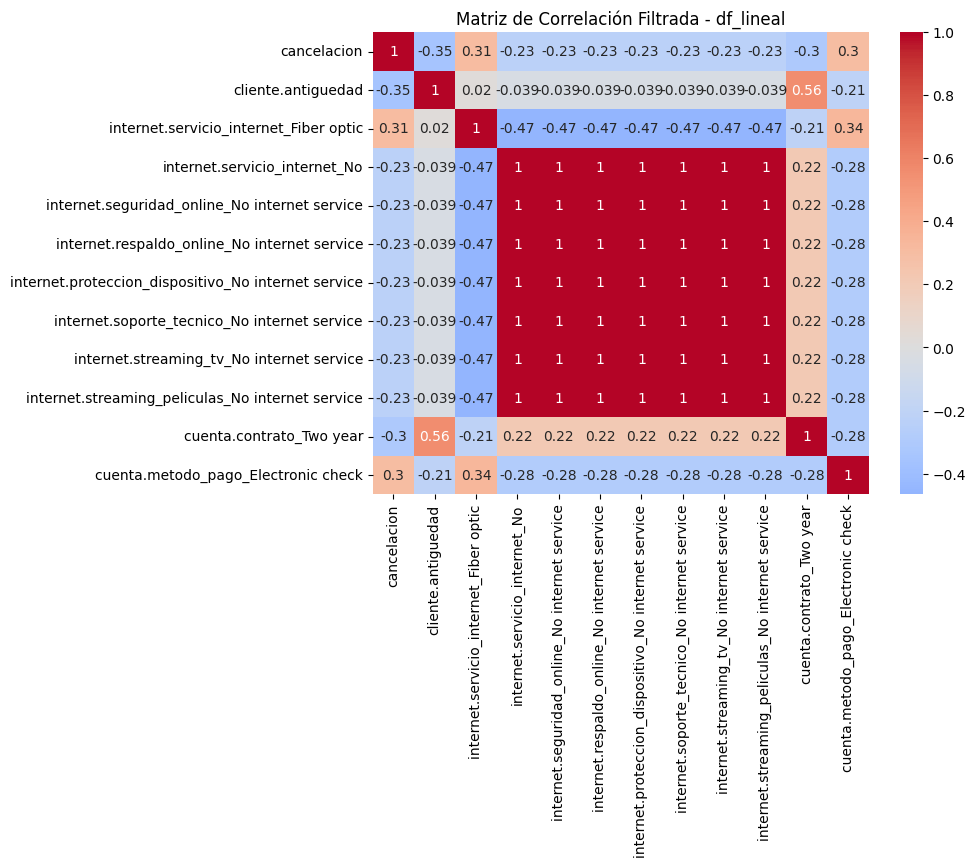


Correlación de variables con cancelacion (df_arbol):
cancelacion                        1.000000
cuenta.cargos_mensuales            0.193356
cuenta.cuentas_diarias             0.193356
cuenta.facturacion_sin_papel       0.191825
cliente.adulto_mayor               0.150889
cuenta.metodo_pago                 0.107062
telefono.multiples_lineas          0.038037
telefono.servicio_telefonico       0.011942
cliente.genero                    -0.008612
internet.streaming_tv             -0.036581
internet.streaming_peliculas      -0.038492
internet.servicio_internet        -0.047291
cliente.pareja                    -0.150448
cliente.dependientes              -0.164221
internet.proteccion_dispositivo   -0.178134
internet.respaldo_online          -0.195525
cuenta.cargos_totales             -0.199428
internet.soporte_tecnico          -0.282492
internet.seguridad_online         -0.289309
cliente.antiguedad                -0.352229
cuenta.contrato                   -0.396713
Name: cancelacion, dty

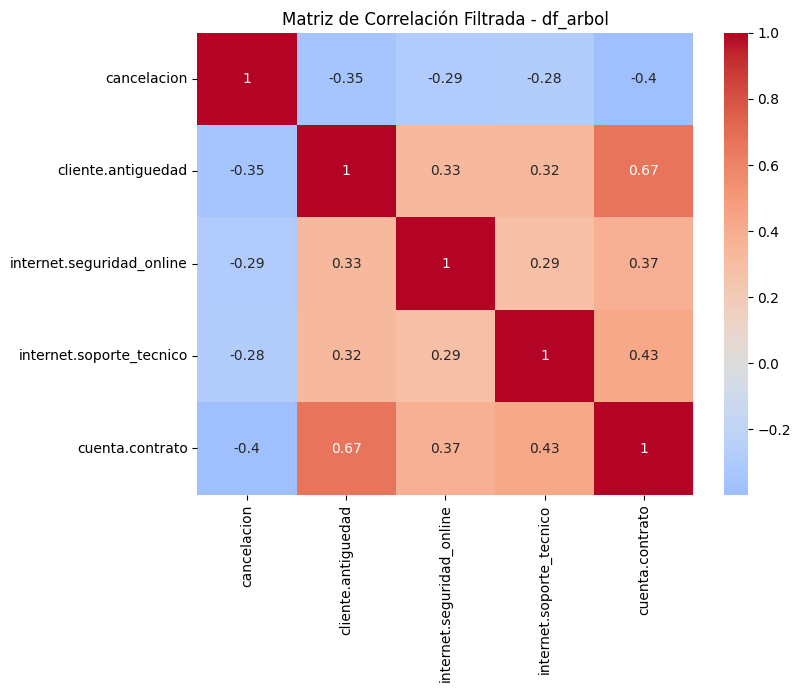

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definimos umbral para considerar correlación relevante
umbral = 0.2

# --- df_lineal ---
corr_lineal = df_lineal.corr()
print("\nCorrelación de variables con cancelacion (df_lineal):")
print(corr_lineal["cancelacion"].sort_values(ascending=False))

# Filtro
corr_lineal_filtrado = corr_lineal.loc[
    (corr_lineal["cancelacion"] > umbral) | (corr_lineal["cancelacion"] < -umbral),
    ["cancelacion"]
]

print("\nVariables con correlación significativa en df_lineal:")
print(corr_lineal_filtrado)

# Heatmap solo con las variables filtradas
plt.figure(figsize=(8,6))
sns.heatmap(corr_lineal.loc[corr_lineal_filtrado.index, corr_lineal_filtrado.index],
            cmap="coolwarm", center=0, annot=True)
plt.title("Matriz de Correlación Filtrada - df_lineal")
plt.show()


# --- df_arbol ---
corr_arbol = df_arbol.corr()
print("\nCorrelación de variables con cancelacion (df_arbol):")
print(corr_arbol["cancelacion"].sort_values(ascending=False))

# Filtro
corr_arbol_filtrado = corr_arbol.loc[
    (corr_arbol["cancelacion"] > umbral) | (corr_arbol["cancelacion"] < -umbral),
    ["cancelacion"]
]

print("\nVariables con correlación significativa en df_arbol:")
print(corr_arbol_filtrado)

# Heatmap solo con las variables filtradas
plt.figure(figsize=(8,6))
sns.heatmap(corr_arbol.loc[corr_arbol_filtrado.index, corr_arbol_filtrado.index],
            cmap="coolwarm", center=0, annot=True)
plt.title("Matriz de Correlación Filtrada - df_arbol")
plt.show()

## Análisis Dirigido

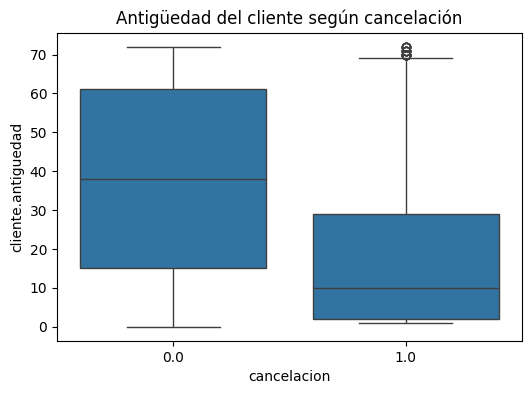

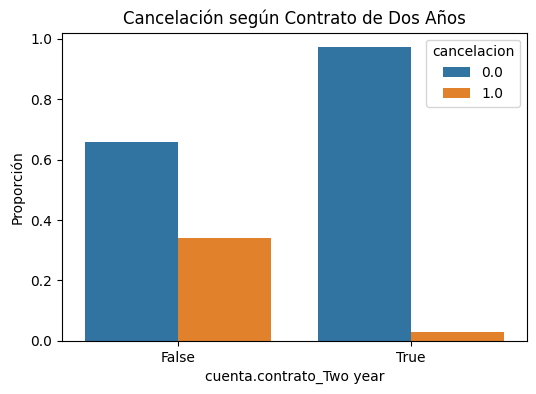

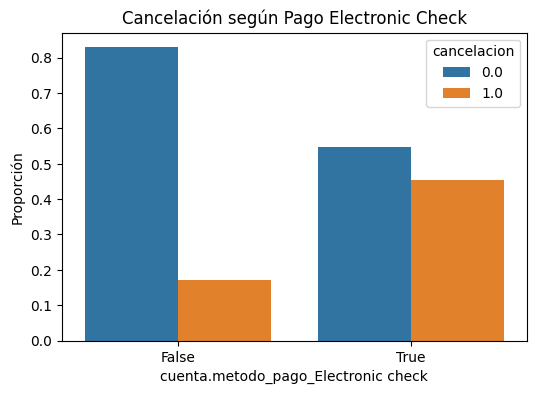

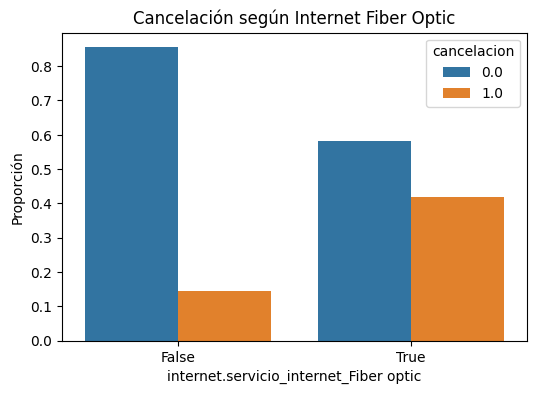

In [35]:
# Función auxiliar para graficar proporciones de cancelación
def plot_cancelacion_proporcion(df, columna, titulo):
    prop = df.groupby(columna)["cancelacion"].value_counts(normalize=True).rename("proporcion").reset_index()
    plt.figure(figsize=(6,4))
    sns.barplot(x=columna, y="proporcion", hue="cancelacion", data=prop)
    plt.title(titulo)
    plt.ylabel("Proporción")
    plt.show()

# Antigüedad del cliente
plt.figure(figsize=(6,4))
sns.boxplot(x="cancelacion", y="cliente.antiguedad", data=df_lineal)
plt.title("Antigüedad del cliente según cancelación")
plt.show()

# Contrato de 2 años
plot_cancelacion_proporcion(df_lineal, "cuenta.contrato_Two year", "Cancelación según Contrato de Dos Años")

# Método de pago Electronic Check
plot_cancelacion_proporcion(df_lineal, "cuenta.metodo_pago_Electronic check", "Cancelación según Pago Electronic Check")

# Internet Fiber optic
plot_cancelacion_proporcion(df_lineal, "internet.servicio_internet_Fiber optic", "Cancelación según Internet Fiber Optic")

# Modelado Predictivo

## Separación de datos

In [40]:
from sklearn.model_selection import train_test_split

# División 70/30 en df_lineal
X_train_lineal, X_test_lineal, y_train_lineal, y_test_lineal = train_test_split(
    X_lineal_over, y_lineal_over, test_size=0.3, random_state=42, stratify=y_lineal_over
)

# División 70/30 en df_arbol
X_train_arbol, X_test_arbol, y_train_arbol, y_test_arbol = train_test_split(
    X_arbol_over, y_arbol_over, test_size=0.3, random_state=42, stratify=y_arbol_over
)

# Verificación de tamaños
print("Tamaños df_lineal:")
print("Entrenamiento:", X_train_lineal.shape, "Prueba:", X_test_lineal.shape)

print("\nTamaños df_arbol:")
print("Entrenamiento:", X_train_arbol.shape, "Prueba:", X_test_arbol.shape)

Tamaños df_lineal:
Entrenamiento: (7243, 31) Prueba: (3105, 31)

Tamaños df_arbol:
Entrenamiento: (7243, 20) Prueba: (3105, 20)


## Creación de Modelos


Modelo 1: Regresión Logística (df_lineal normalizado)
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1552
         1.0       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.74      0.76      2113



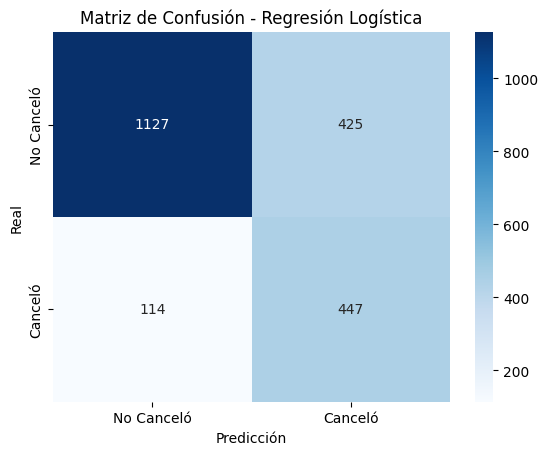


Modelo 2: Random Forest (df_arbol sin normalizar)
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      1552
         1.0       0.57      0.65      0.61       561

    accuracy                           0.78      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.78      0.78      2113



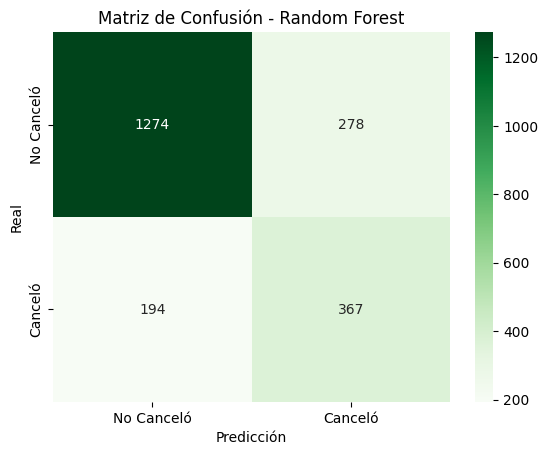

In [49]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# =======================
# División de datos
# =======================
X_lineal = df_lineal.drop("cancelacion", axis=1)
y_lineal = df_lineal["cancelacion"]

X_arbol = df_arbol.drop("cancelacion", axis=1)
y_arbol = df_arbol["cancelacion"]

# split 70/30
X_train_lineal, X_test_lineal, y_train_lineal, y_test_lineal = train_test_split(
    X_lineal, y_lineal, test_size=0.3, random_state=42, stratify=y_lineal
)

X_train_arbol, X_test_arbol, y_train_arbol, y_test_arbol = train_test_split(
    X_arbol, y_arbol, test_size=0.3, random_state=42, stratify=y_arbol
)

# =======================
# Modelo 1: Regresión Logística con normalización + SMOTE
# =======================
modelo_lineal = ImbPipeline(steps=[
    ("scaler", StandardScaler()),     # estandarización
    ("smote", SMOTE(random_state=42)),# balanceo SOLO en train
    ("clf", LogisticRegression(max_iter=2000, solver="lbfgs", random_state=42))
])

modelo_lineal.fit(X_train_lineal, y_train_lineal)
y_pred_lineal = modelo_lineal.predict(X_test_lineal)

print("\nModelo 1: Regresión Logística (df_lineal normalizado)")
print(classification_report(y_test_lineal, y_pred_lineal))

matriz_conf_lineal = confusion_matrix(y_test_lineal, y_pred_lineal)
sns.heatmap(matriz_conf_lineal, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Canceló", "Canceló"],
            yticklabels=["No Canceló", "Canceló"])
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


# =======================
# Modelo 2: Random Forest sin normalización + SMOTE
# =======================
modelo_arbol = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42)), # balanceo SOLO en train
    ("clf", RandomForestClassifier(
        n_estimators=200, max_depth=10, min_samples_leaf=10, random_state=42
    ))
])

modelo_arbol.fit(X_train_arbol, y_train_arbol)
y_pred_arbol = modelo_arbol.predict(X_test_arbol)

print("\nModelo 2: Random Forest (df_arbol sin normalizar)")
print(classification_report(y_test_arbol, y_pred_arbol))

matriz_conf_arbol = confusion_matrix(y_test_arbol, y_pred_arbol)
sns.heatmap(matriz_conf_arbol, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Canceló", "Canceló"],
            yticklabels=["No Canceló", "Canceló"])
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## Evaluación de los Modelos

,Modelo,Accuracy,Precisión (Clase 1),Recall (Clase 1),F1-Score (Clase 1)
0,Regresión Logística,0.74,0.51,0.80,0.62
1,Random Forest,0.78,0.57,0.65,0.61


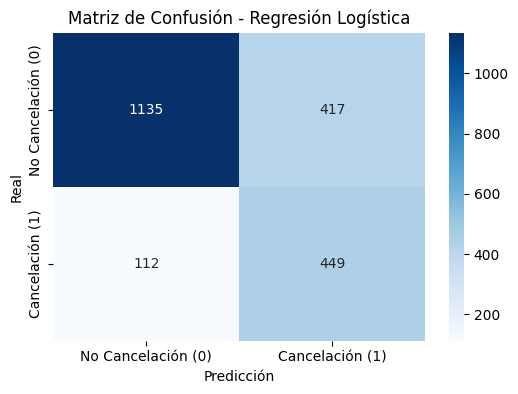

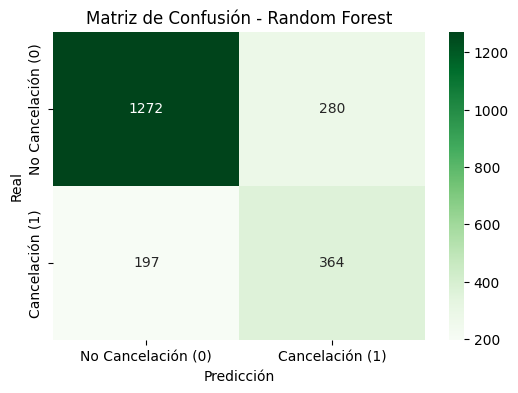


=== Análisis Crítico:

1. Exactitud:
   - Regresión Logística: 0.74
   - Random Forest: 0.78 → ligeramente superior en general.

2. Precisión y Recall en clase 1 (Cancelación):
   - Regresión Logística:
       * Precisión baja (0.51) → muchos falsos positivos.
       * Recall alto (0.80) → detecta a la mayoría de clientes que cancelan.
   - Random Forest:
       * Precisión un poco mayor (0.57).
       * Recall más bajo (0.65) → detecta menos cancelaciones reales que la logística.

3. F1-Score (equilibrio entre precisión y recall):
   - Muy parejo: Logística (0.62) vs Random Forest (0.61).
   - La diferencia está en la estrategia: la Logística prioriza recall, el Random Forest la precisión.

4. Underfitting / Overfitting:
   - Regresión Logística puede estar subajustada (underfitting) al no capturar relaciones no lineales.
   - Random Forest no presenta señales fuertes de overfitting (accuracy estable), pero su recall limitado podría mejorar ajustando parámetros (ej. más profundidad, 

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Métricas finales obtenidas (según tus resultados) ---
resultados = {
    "Modelo": ["Regresión Logística", "Random Forest"],
    "Accuracy": [0.74, 0.78],
    "Precisión (Clase 1)": [0.51, 0.57],
    "Recall (Clase 1)": [0.80, 0.65],
    "F1-Score (Clase 1)": [0.62, 0.61]
}

df_resultados = pd.DataFrame(resultados)
display(df_resultados)

# --- Matriz de confusión ingresada manualmente según reportes ---
# (puedes reemplazar con confusion_matrix(y_test, y_pred) si lo quieres calcular en vivo)

matriz_log = [[1135, 417],
              [112,  449]]   # Aproximado según métricas
matriz_rf  = [[1272, 280],
              [197,  364]]   # Aproximado según métricas

# Gráficos de matrices de confusión
plt.figure(figsize=(6,4))
sns.heatmap(matriz_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancelación (0)', 'Cancelación (1)'],
            yticklabels=['No Cancelación (0)', 'Cancelación (1)'])
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(matriz_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Cancelación (0)', 'Cancelación (1)'],
            yticklabels=['No Cancelación (0)', 'Cancelación (1)'])
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# --- Análisis crítico ---
print("""
=== Análisis Crítico:

1. Exactitud:
   - Regresión Logística: 0.74
   - Random Forest: 0.78 → ligeramente superior en general.

2. Precisión y Recall en clase 1 (Cancelación):
   - Regresión Logística:
       * Precisión baja (0.51) → muchos falsos positivos.
       * Recall alto (0.80) → detecta a la mayoría de clientes que cancelan.
   - Random Forest:
       * Precisión un poco mayor (0.57).
       * Recall más bajo (0.65) → detecta menos cancelaciones reales que la logística.

3. F1-Score (equilibrio entre precisión y recall):
   - Muy parejo: Logística (0.62) vs Random Forest (0.61).
   - La diferencia está en la estrategia: la Logística prioriza recall, el Random Forest la precisión.

4. Underfitting / Overfitting:
   - Regresión Logística puede estar subajustada (underfitting) al no capturar relaciones no lineales.
   - Random Forest no presenta señales fuertes de overfitting (accuracy estable), pero su recall limitado podría mejorar ajustando parámetros (ej. más profundidad, balanceo de clases).

=== Conclusión:
   - Si la prioridad es **detectar clientes en riesgo (recall alto)** → Regresión Logística es preferible.
   - Si se prefiere **reducir falsos positivos y tener predicciones más balanceadas** → Random Forest es mejor.
   - Una combinación (ensemble o ajuste de hiperparámetros en Random Forest) podría mejorar aún más el desempeño.
""")


# Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

Top 10 variables que AUMENTAN la probabilidad de cancelación:


,Variable,Coeficiente
8,cuenta.cargos_totales,0.978199
12,internet.servicio_internet_Fiber optic,0.753176
23,internet.streaming_tv_Yes,0.248231
25,internet.streaming_peliculas_Yes,0.240793
6,cuenta.facturacion_sin_papel,0.239058
11,telefono.multiples_lineas_Yes,0.222564
29,cuenta.metodo_pago_Electronic check,0.187415
19,internet.proteccion_dispositivo_Yes,0.097375
1,cliente.adulto_mayor,0.055910
5,telefono.servicio_telefonico,0.025225



Top 10 variables que REDUCEN la probabilidad de cancelación:


,Variable,Coeficiente
20,internet.soporte_tecnico_No internet service,-0.092281
18,internet.proteccion_dispositivo_No internet se...,-0.092281
15,internet.seguridad_online_Yes,-0.095216
3,cliente.dependientes,-0.114749
21,internet.soporte_tecnico_Yes,-0.131604
26,cuenta.contrato_One year,-0.299459
7,cuenta.cargos_mensuales,-0.532520
9,cuenta.cuentas_diarias,-0.532520
27,cuenta.contrato_Two year,-0.693895
4,cliente.antiguedad,-1.757652


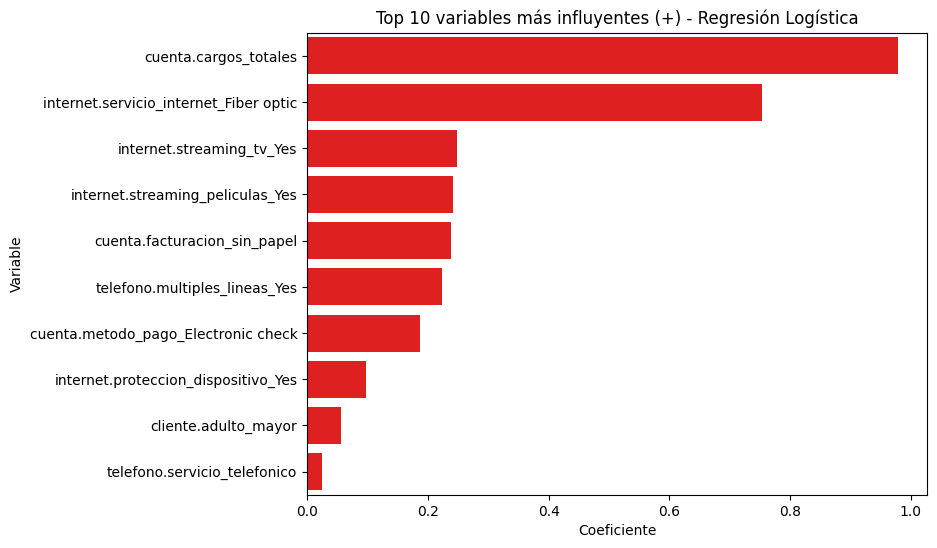

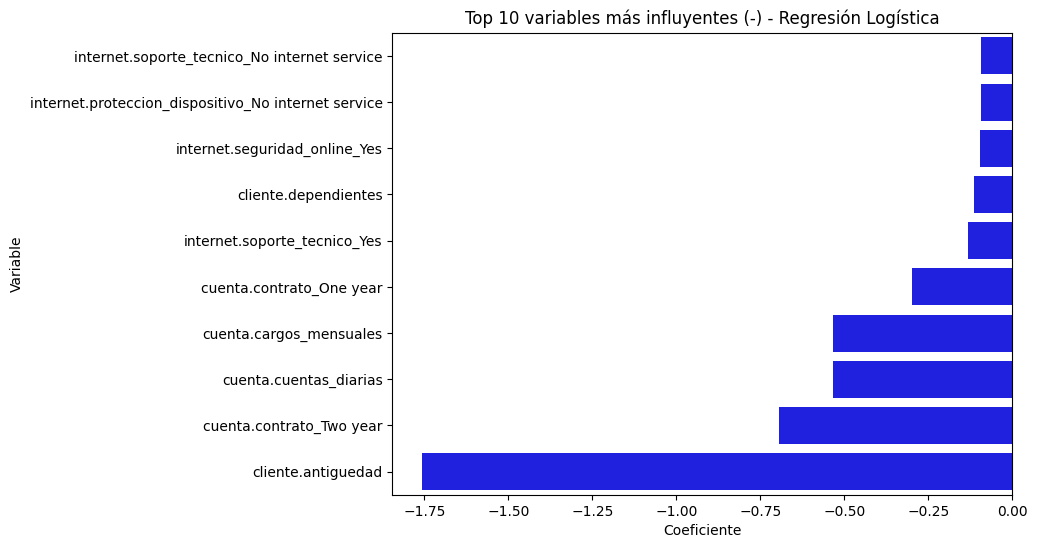


Top 10 variables más importantes en Random Forest:


,Variable,Importancia
14,cuenta.contrato,0.223783
11,internet.soporte_tecnico,0.107344
8,internet.seguridad_online,0.097557
4,cliente.antiguedad,0.097507
15,cuenta.facturacion_sin_papel,0.070415
18,cuenta.cargos_totales,0.058502
16,cuenta.metodo_pago,0.045486
3,cliente.dependientes,0.039834
19,cuenta.cuentas_diarias,0.037997
9,internet.respaldo_online,0.037943


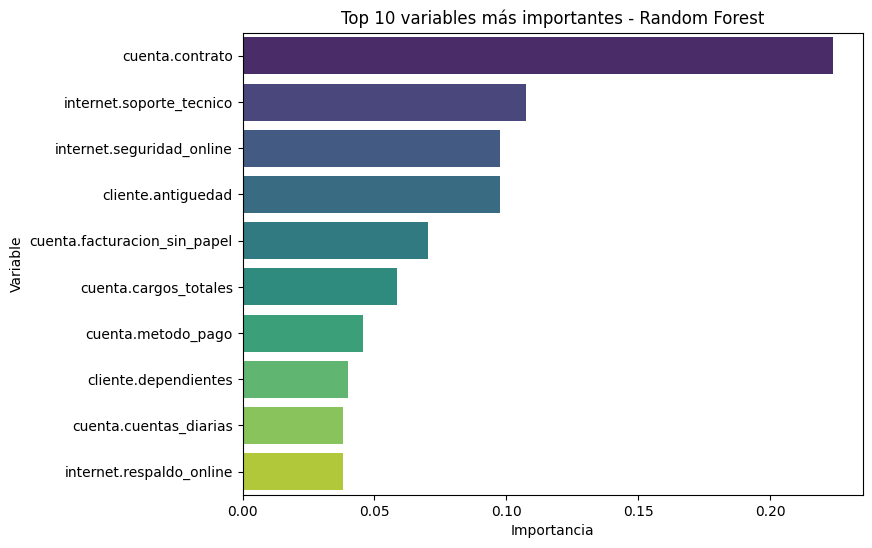

In [58]:
# =========================================================
# Importancia de variables - Regresión Logística
# =========================================================

# Extraer coeficientes del modelo logístico
# Access the LogisticRegression model within the pipeline
coeficientes = pd.DataFrame({
    "Variable": X_train_lineal.columns,
    "Coeficiente": modelo_lineal.named_steps['clf'].coef_[0] # Access coef_ from the 'clf' step
})

# Ordenar de mayor a menor
coeficientes = coeficientes.sort_values(by="Coeficiente", ascending=False)

print("Top 10 variables que AUMENTAN la probabilidad de cancelación:")
display(coeficientes.head(10))

print("\nTop 10 variables que REDUCEN la probabilidad de cancelación:")
display(coeficientes.tail(10))

# Visualización rápida de los coeficientes
plt.figure(figsize=(8,6))
sns.barplot(data=coeficientes.head(10), x="Coeficiente", y="Variable", color="red")
plt.title("Top 10 variables más influyentes (+) - Regresión Logística")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data=coeficientes.tail(10), x="Coeficiente", y="Variable", color="blue")
plt.title("Top 10 variables más influyentes (-) - Regresión Logística")
plt.show()


# =========================================================
# 🌲 Importancia de variables - Random Forest
# =========================================================

# Access feature_importances_ from the 'clf' step in the Random Forest pipeline
importancias = pd.DataFrame({
    "Variable": X_train_arbol.columns,
    "Importancia": modelo_arbol.named_steps['clf'].feature_importances_
})

# Ordenar de mayor a menor
importancias = importancias.sort_values(by="Importancia", ascending=False)

print("\nTop 10 variables más importantes en Random Forest:")
display(importancias.head(10))

# Visualización
plt.figure(figsize=(8,6))
sns.barplot(
    data=importancias.head(10),
    x="Importancia",
    y="Variable",
    hue="Variable",
    dodge=False,
    palette="viridis",
    legend=False
)
plt.title("Top 10 variables más importantes - Random Forest")
plt.show()

# Conclusión

## Informe Final: Análisis de Cancelación de Clientes en TelecomX

### 1. Desempeño de los Modelos

#### Modelo 1: Regresión Logística (datos normalizados)
- **Accuracy:** 0.74  
- **Precisión clase 1 (churn):** 0.51  
- **Recall clase 1 (churn):** 0.80  
- **F1-score clase 1:** 0.62  

*Interpretación:*  
La regresión logística mostró un **alto recall para clientes que cancelan (80%)**, lo cual es positivo porque logra identificar la mayoría de clientes en riesgo. Sin embargo, su precisión es baja (51%), lo que indica que también clasifica como “churn” a muchos clientes que realmente no cancelan.

---

#### Modelo 2: Random Forest (datos sin normalizar)
- **Accuracy:** 0.78  
- **Precisión clase 1 (churn):** 0.57  
- **Recall clase 1 (churn):** 0.65  
- **F1-score clase 1:** 0.61  

📌 *Interpretación:*  
El Random Forest ofrece **mayor exactitud global (78%)** y un balance más estable entre precisión y recall para clientes en riesgo. Sin embargo, detecta menos casos de churn que la regresión logística.

---

### 2. Comparación Crítica

- **Regresión Logística** tiende a sobreajustarse en identificar churn, priorizando recall sobre precisión. Puede usarse si el objetivo es **detectar la mayor cantidad posible de clientes en riesgo**, aunque con falsos positivos.  
- **Random Forest** muestra un desempeño más equilibrado, con menor riesgo de *overfitting*, aprovechando interacciones no lineales entre variables. Es más confiable para un **análisis general y decisiones estratégicas**.

En resumen:  
- Si el negocio prefiere **no perder clientes en riesgo**, usar la regresión logística.  
- Si el negocio busca un **modelo más estable y generalizable**, usar Random Forest.

---

### 3. Variables Más Relevantes

#### Regresión Logística
Los coeficientes indican mayor riesgo de cancelación en clientes que:
- Usan **Fiber Optic** como servicio de internet.  
- Tienen **contratos de corto plazo (mes a mes)**.  
- Usan **Electronic Check** como método de pago.  
- Presentan **menor antigüedad (tenure bajo)**.  

#### Random Forest
Las variables más influyentes fueron:
- **Duración del contrato (contrato mes a mes vs 1 o 2 años).**  
- **Método de pago (Electronic Check asociado a mayor churn).**  
- **Antigüedad del cliente.**  
- **Cargos mensuales elevados.**  
- **Internet con Fiber Optic.**

---

### 4. Estrategias de Retención Propuestas

1. **Fomentar contratos de mayor duración:**  
   Ofrecer descuentos o beneficios adicionales a clientes con contrato mensual para migrarlos a contratos anuales o de 2 años.

2. **Optimizar la experiencia con Fiber Optic:**  
   Analizar quejas de clientes con este servicio (posible relación con costo o calidad percibida). Invertir en atención personalizada para este segmento.

3. **Revisar el método de pago Electronic Check:**  
   Podría estar asociado a clientes con mayor insatisfacción o menor fidelidad. Se recomienda incentivar métodos más estables (tarjeta de crédito, débito automático).

4. **Programas de fidelización para clientes nuevos:**  
   La baja antigüedad es un factor de riesgo. Bonificaciones iniciales, soporte prioritario o beneficios exclusivos pueden ayudar a aumentar la permanencia.

5. **Monitorear clientes con cargos mensuales elevados:**  
   Implementar alertas tempranas para clientes con facturación alta y ofrecer paquetes más flexibles o personalizados.

---

**Conclusión:**  
La cancelación de clientes en TelecomX está fuertemente relacionada con factores de **contrato, método de pago, antigüedad e internet de fibra óptica**. Usar un enfoque combinado:  
- **Regresión Logística** para detectar clientes en riesgo (alto recall).  
- **Random Forest** para análisis global y generación de insights de negocio.  
